---
title: Neural Networks Code and Explanation 
date: 
author: Srusti 
date: "2023-06-27"
categories: [blog]
image: "https://www.investopedia.com/thmb/PgHPmalVUUHIQrp616mTdlmyD0I=/750x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/dotdash_Final_Neural_Network_Apr_2020-01-5f4088dfda4c49d99a4d927c9a3a5ba0.jpg"
---

Import the necessary packages. Also import the iris dataset, which we will be using to train the neural network. The iris dataset is a widely-known, relatively small dataset which can be used to train this simple neural network. 

In [28]:
import torch  #torch is an open source ML library used for creating deep neural networks
import torch.nn as nn  
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from sklearn.datasets import load_iris #scikit-learn is a data analysis library for machine learning
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder #converts categorical variables into a numerical format that can be used by ML algorithms
import matplotlib.pyplot as plt

The iris dataset contains categorical variables (attributes are sepal length, sepal width, petal length, petal width), which is why we import OneHotEncoder. OneHotEncoder will allow us to preprocess the data from the iris dataset by converting the categorical attributes to numerical formats so that the neural network can understand it.

Before getting into the code, here is a conceptual outline of a neural network architecture:


A neural network has three main components: input layer, hidden layers, output layer.

1. Input layer: where the neural network receives data represented as numbers.

2. Hidden layers: layers of the neural network; intermediate processing steps where the model extracts and learns complex patterns and features from the input data. Within the hidden layers, an activation function introduces non-linearities, allowing the network to capture complex relationships and make more sophisticated predictions.

Each hidden layer can capture different levels of abstraction, with earlier layers learning simple features and later layers combining them to learn more complex patterns. The number of hidden layers and the number of neurons within each layer can be adjusted based on the complexity of the problem at hand. By adding more hidden layers, the neural network can learn increasingly abstract representations of the data.

3. Output layer: where the final prediction or output based on the computations performed by the hidden layers is provided.

Many people think of neural networks as this mysterious black box which just predicts information. To more concretely understand what's going on, here is a more detailed explanation what happens when you put input data through a neural network:

Input data is put into neural networks, and neural networks are a just a collection of nested functions. These functions are defined by parameters (consisting of weights and biases). 

Think of weights as the knobs that control how much attention the neural network should pay to each feature. For example, for a neural network which classifies the fruit in images of various fruits, if the weight for the color feature is high, it means that the network considers color to be more important in the prediction. Conversely, if the weight is low, the network assigns less importance to that feature. During the training phase of a neural network, these weights are adjusted based on the input data and the desired output. 

Biases provide the neural network with the ability to make predictions even when all the input features are zero or missing. In our fruit example, biases can be thought of as an inherent inclination of the neural network to lean towards predicting one fruit over the other, regardless of the input values. They act as an additional input to each neuron in the network and help in adjusting the output of the neuron. 

The parameters (weights and biases) are stored in tensors. Tensors are PyTorch’s version of arrays and matrices.

The entire process of running the input data through each of the NN's functions to make its best guess about the correct output is known as a forward propagation, or forward pass.

During training, after a forward pass, the NN goes through backward propagation: in backprop, the NN adjusts its parameters proportionate to the error in its guess. This error (known as the "loss") is the mathematical difference between what the NN predicted and the correct answer (called the "ground truth"). The NN does this by traversing backwards from the output, back into each of the layers, collecting the derivatives of the error with respect to the parameters of the functions (parameters are like settings that control how the NN works). 

Once the network knows how each parameter affects the error with those derivatives (called "gradients"), it can update the parameters in a way that reduces the error. This updating process is called "gradient descent." It adjusts the parameters step by step, using the information from the gradients, to make the network better at making predictions.

By repeating this process with many examples and adjusting the parameters based on the gradients, the network gradually improves its performance and becomes better at making accurate predictions.

Now, to the code!

The following code defines the neural network:

In [29]:
#defining neural network

class MyNeural(nn.Module):
    def __init__(self, input, hidden_layers, output):
        super().__init__()
        self.inputLayer = torch.nn.Linear(input, hidden_layers[0])
        self.hlayers = torch.nn.ModuleDict(
            {f"hL{i}": torch.nn.Linear(hidden_layers[i], hidden_layers[i+1]) for i in range(len(hidden_layers) - 1)}
        )
        self.outputLayer = torch.nn.Linear(hidden_layers[-1], output)
        self.sig = nn.Sigmoid()

    def forward(self, x):
        x = F.relu(self.inputLayer(x))
        for name, layer in self.hlayers.items():
            x = F.relu(layer(x))
        x = self.outputLayer(x)
        y = self.sig(x)
        return y

Explanation of above code, line by line:

1. When using PyTorch, which is a machine learning framework based on the Torch library, like we are here, you need to create a sub-class within the nn.Module and implement your neural network architecture within it. The name of our sub-class, our neural network architecture, is MyNeural. 

2. Initialize the MyNeural class. The initialization method takes in an input, which is the dimensions of the input layer, dimensions of the hidden layers, and dimensions of the output layer of the neural network. For example, in the iris dataset, the input layer will be 4 because there are 4 attributes: sepal length, sepal width, petal length, petal width (note: do not count the 'species' category as one of the attributes because that is what we are trying to predict with this dataset, so it should not be an input).

3. This line calls the initialization method of the parent class (nn.Module). It ensures that the necessary setup is done before defining the architecture of the custom neural network.

4. This line creates the input layer of the neural network using the torch.nn.Linear class. It specifies that the input layer has "input" number of input features and outputs "hidden_layers[0]" number of neurons.

This linear layer performs a linear transformation on the input data (an oversimplified explanation: takes the input data, factors in weights and biases of the network, and turns the data into the values of the neuron within the network). The .Linear method creates fully connected layers, where each neuron is connected to every neuron in the previous layer (see diagram at start of blog). 

5. This line creates the hidden layers of the neural network using the torch.nn.Linear class. It creates a ModuleDict object named hlayers, which is a dictionary-like structure that holds the hidden layers. It uses a dictionary comprehension to iterate over the range of len(hidden_layers) - 1 and creates a linear layer for each hidden layer. The keys of the dictionary are formatted as hLi, where i is the index of the hidden layer, and the corresponding value is the linear layer itself. Each linear layer specifies the number of input and output features for the corresponding hidden layer.

6. This line creates the output layer of the neural network using the torch.nn.Linear class. It specifies that the output layer has hidden_layers[-1] number of input features (the output size of the last hidden layer) and output number of output features (neurons).

7. Sigmoid is an activation function (here we are defining the output function), which will introduce non-linearity and allow the network to capture complex relationships and make more sophisticated predictions. This line creates an instance of the nn.Sigmoid class and assigns it to the variable self.sig.

8. Declares the forward method of the class, which takes x as the input data. The forward methos is used for a "forward pass," which is the process of inputting data into the neural network, propagating it forwards, through the hidden layers, and producing an output inference/prediction from the output layer.

9. This line applies the ReLU (Rectified Linear Unit) activation function to the input data x after passing it through the self.inputLayer linear layer. The F.relu function is a shorthand for applying the ReLU activation function element-wise. In specific, reLu is an activation function which takes any number you put into it (from the hidden layers), and if any of those numbers is negative, it turns them into positive, and if they are positive, it retains it. The reason for this is to promote efficiency and reduce the computational load of the network by focusing on relevant features and reducing redundant computations

10. This line starts a loop over the hidden layers of the neural network. It iterates through the self.hlayers dictionary, which holds the hidden layers of the network.

11. Inside the loop, this line applies the ReLU activation function to the intermediate results obtained by passing the data x through each hidden layer (layer). The ReLU activation function introduces non-linearity to the network. The ReLu function needs to be applied after EVERY hidden layer in order to ensure complex patterns are understood by the model, which is why we are iterating through each hidden layer using a for loop.

12. After the loop, this line applies the output layer (self.outputLayer) to the intermediate results (x). The output layer typically performs a linear transformation on the data without applying an activation function.

13. This line applies the sigmoid activation function (self.s) to the output of the neural network (x). The sigmoid function squeezes the output values between 0 and 1, often used for binary classification or probability estimation. There are many types of activation functions, but Sigmoid is used for predicting probabilities in datasets with attributes that are categorical, like the iris dataset (e.g. sepal width, petal length, etc.)

14. This line returns the final output y from the forward method (produces the output after a forward pass).


In [30]:
iris = datasets.load_iris()
data = iris.data #assigning data (data represents features)
target = iris.target #assigning target (which are class labels)

Here, we the iris dataset.

We assign the data part of the Iris dataset to the variable data.
iris.data represents the features or input variables. It is a two-dimensional array-like object where each row corresponds to a sample (flower) and each column represents a specific feature (sepal length, sepal width, petal length, petal width).
After executing this line, the variable data will hold the feature data from the Iris dataset.

Next, assign the target part of the Iris dataset. iris.target represents the class labels, which are the species of flower. Labels are like the ground truth or the correct answers that the neural network learns to predict. By providing labels during the training phase, the network learns to associate specific patterns or features in the input data with the corresponding labels. 
The class labels in the Iris dataset are encoded as integers, where 0 represents setosa, 1 represents versicolor, and 2 represents virginica.
After executing this line, the variable target will hold the class label data from the Iris dataset.

In [31]:
trainD, testD, trainT, testT = train_test_split(data, target, test_size=0.1, random_state=42) 

tTrainD = torch.from_numpy(trainD).float() #training data
tTrainT = torch.from_numpy(trainT).long() #training targets
tTestD = torch.from_numpy(testD).float() #testing data
tTestT = torch.from_numpy(testT).long() #testing targets

Before explaining the above chunk, let's go through the process of how a neural network is trained and tested. 

After loading the dataset, we split the data into train, test, and validation sections (validation is just another test). So, the training will be done on one subset of the data, but the testing will be done on a different subset of the data (but within the same dataset). Doing this allows the model to use the complex relationships and patterns it identified from the training data to predict on different test data.

In the first line of code above, we are splitting the dataset into training and test sets (for simplification purposes, we are not splitting it into validation too), and specifying the training and testing targets (species) within the dataset as well. test_size = 0.1 ensures that 10% of the data is allocated for testing. random_state is just some arbitrary parameter that, when set again at the same value, will ensure the same exact random splits in data are used (in case you want to retest the neural network with the same splits of the dataset into test and training groups). 

The next provided code converts the NumPy arrays representing training and testing data and targets that we made in the first line of code into PyTorch tensors. Tensors are PyTorch’s version of arrays and matrices.

This conversion allows for seamless integration with PyTorch and enables further processing, manipulation, and training of neural networks using the converted tensors. The .float() and .long() methods are used to ensure the appropriate data types for the tensors based on the nature of the data (float for input features (numerical data like sepal and petal length) and long for labels or targets (flower species label)).

In [32]:
#creating custom dataset object

class myDataset():
    def __init__(self, x, y): #initialize by putting in the dataset, which is 1 million by 4 attributes for iris 
        self.x = x
        self.y = y
    def __len__(self): #pytorch will look at the length (the number of rows) in dataset
        length_ml = self.x.shape[0]
        return(length_ml)
    def __getitem__(self, idx): # says how to I source one training item and return it back to you, and the next time you call this function,
        #it is going to select a different training item (keeping the training items it already used in its memory)
        return (self.x[idx, :], self.y[idx])

The first four lines in the above code define a custom dataset class myDataset in PyTorch. The class encapsulates the input features (self.x) and labels (self.y) of the iris dataset into a single object, which helps organize and manage your data in a structured manner, making it easier to work with and reducing the risk of errors or data inconsistencies.

The next 3 lines of code (def __len__(self) ...) provide methods to determine the length of the dataset. These methods are called by PyTorch to determine the length of the dataset, i.e., the number of samples in the dataset.

The last two lines of code (def __getitem__(self, idx) ...) retrieve individual samples by index. The __getitem__ method allows you to define how individual samples are accessed from the dataset. This customization is valuable when you need to implement specific data preprocessing or transformations before feeding the data into the neural network.

In [33]:
trainDataset = myDataset(tTrainD, tTrainT)
trainDataset

By passing tTrainD (training data) and tTrainT (training targets) as arguments, you are initializing the trainDataset object with the corresponding data and targets in preparation for training.

Explanation of the process of training neural networks:

When training a neural network, the process of splitting the data into batches is an essential step that enables efficient training. Instead of processing the entire dataset at once, the data is divided into smaller subsets called batches. Each batch contains a fixed number of samples, and the network is updated based on the gradients computed from the predictions and the corresponding targets within the batch.

The process of training a neural network with batching typically involves the following steps:

Data Loading: The training dataset is loaded, either as a whole or through a data loader object, which provides access to the data in batches. The data loader takes care of shuffling, batching, and any necessary preprocessing.

Mini-batch Iteration: The training data is divided into mini-batches, each containing a predefined number of samples (specified by the batch size). The network will process one mini-batch at a time.

Forward Pass: For each mini-batch, the input data is fed forward through the network. The network computes predictions for the samples in the mini-batch.

Loss Computation: The predictions from the forward pass are compared to the corresponding target values (labels) for the samples in the mini-batch. This comparison generates a loss value, which quantifies the error between the predicted outputs and the true targets.

Backward Pass and Parameter Update: The loss is used to compute gradients with respect to the network parameters. The gradients indicate the direction and magnitude of the updates required to minimize the loss. The gradients are backpropagated through the network using the chain rule of derivatives. The network's parameters are then updated using an optimization algorithm (e.g., gradient descent or its variants) based on these gradients.

Iteration: Steps 3 to 5 are repeated for each mini-batch in the training data. This process is typically performed for multiple epochs, where an epoch refers to one complete pass through the entire training dataset. The network updates its parameters after each mini-batch, gradually improving its performance over the epochs.



In [34]:
train_loader = DataLoader(trainDataset, batch_size=8, shuffle=True)
train_loader

trainDataset: This is the dataset object that you want to load using the data loader. It should be an instance of a PyTorch dataset class. We already defined trainDataset st chunk of code using the myDataset custom object we created.

batch_size: Specifies the number of samples to load in each batch. In this case, each batch will contain 8 samples.

shuffle: If set to True, the data loader will shuffle the samples before each epoch (a complete iteration over the dataset). Shuffling the data helps in randomizing the order of the samples and can improve the model's training performance.

Essentially, the training examples are split into groups called "batches". This allows the dataset to be "loaded" into the network, or processed, in more manageable, smaller chunks. Those batches then produce some output values, get backpropagated, and each and every batch individually goes through the NN in each epoch. An epoch is one pass through your entire training data. So if there are 30 epochs, you are training 30 times.

In [35]:
#naming the neural network and setting dimensions of layers
myNN = MyNeural(4, [5, 6, 7, 6], 4)
myNN

MyNeural(
  (inputLayer): Linear(in_features=4, out_features=5, bias=True)
  (hlayers): ModuleDict(
    (hL0): Linear(in_features=5, out_features=6, bias=True)
    (hL1): Linear(in_features=6, out_features=7, bias=True)
    (hL2): Linear(in_features=7, out_features=6, bias=True)
  )
  (outputLayer): Linear(in_features=6, out_features=4, bias=True)
  (sig): Sigmoid()
)

In the above code, for the neural network model 'MyNeural' which we defined earlier:

We set 4 input features (4 because of the number attributes of the iris dataset: sepal width, sepal length, petal width, and petal length). The 4 input features produce 5 features (aka 5 neurons) in the first hidden layer, 6 neurons in the second hidden layer, 7 in the third, 6 in the fourth, and finally output 4 features as a prediction. So, the values in the list [5, 6, 7, 6] assign the number of neurons in each hidden layer, and the length of the list corresponds to the number of hidden layers. Here, there are 4 hidden layers. These dimensions for MyNeural are all assigned to myNN -- which becomes the name of the specific neural network.

In [36]:
opt = torch.optim.SGD(myNN.parameters(), lr = 0.01)
lossfunction = nn.CrossEntropyLoss()

Based on the gradients computed by backpropagation, an optimizer is an algorithm or method used to adjust the parameters of the model during the training process in order to minimize the loss (to produce a more accurate prediction). 
In the above code, we are initializing an optimizer object (opt) of type Stochastic Gradient Descent (SGD). It takes two arguments:

myNN.parameters(): This specifies the parameters of your neural network model (myNN) that will be optimized during training. The optimizer will update these parameters based on the computed gradients.
lr=0.01: This sets the learning rate for the optimizer. The learning rate determines the step size taken during optimization, influencing how quickly the model learns and converges.

Even though we used the SGD optimizer here, there other examples of optimizers including Adam, RMSprop, Adagrad, etc., all of which have their own strengths and weaknesses.

The loss function calculates the discrepancy between the predicted outputs and the ground truth labels, providing a measure of the model's performance during training. The CrossEntropyLoss() function from torch.nn is commonly used for multi-class classification tasks, like the classification of species that we are doing with the iris dataset. 

In [37]:
#training loop for an NN model

num_epochs = 1000
train_loss = []
test_loss = []

for epoch in range(num_epochs):
    myNN.train()
    running_loss = 0
    dt_size = 0
    for i, (batchX, batchY) in enumerate(train_loader): 
        #batchY represents target (actual) labels corresponding to input data batch (batchX)
        opt.zero_grad()
        output = myNN(batchX)
        loss = lossfunction(output, batchY)
        loss.backward()
        opt.step()
        running_loss += loss.item() * batchX.size(0)
        dt_size += batchX.size(0)
    train_loss.append(running_loss / dt_size)

    myNN.eval()
    with torch.no_grad():
        p = myNN(tTestD) #forward pass on testing data subset
        l = lossfunction(p, tTestT) #loss calculation
        test_loss.append(l.item())


The above code essentially iterates over the training data, performs forward and backward passes, updates the model parameters, and calculates and stores the training and testing loss for each epoch.

An explanation of the code, line by line:

- `num_epochs = 1000`: This variable indicates the number of training epochs, specifying how many times the entire dataset will be iterated (repeatedly ran through the NN) during training.

- `train_loss` and `test_loss` are empty lists that will store the training and testing loss values for each epoch, respectively, within the for loop later.

- The loop `for epoch in range(num_epochs):` iterates over the specified number of epochs.

- `myNN.train()` sets the neural network model (`myNN`) in training mode.

- `running_loss` and `dt_size` variables are initialized to track the cumulative loss and the total size of the training dataset.

- The inner loop `for i, (batchX, batchY) in enumerate(train_loader):` iterates over the batches of data from the training data loader (`train_loader`). The enumerate(train_loader) part adds an index counter (i) to each batch returned by the train_loader. This means that as you iterate over the batches in the train_loader, you also have access to the index or position of the current batch. The index counter (i) starts from 0 and increments by 1 for each batch in the train_loader. It allows you to keep track of the progress and index of the current batch within the training loop.

- `opt.zero_grad()` clears the gradients of the optimizer before calculating the new gradients after every batch. This is VERY important to include because during backpropagation, gradients are calculated and stored for each parameter of the model. If the gradients are not cleared, they would accumulate from one iteration to the next. This would result in incorrect gradient values and lead to incorrect updates of the model parameters. Many people forget it! 

- `output = myNN(batchX)` computes the forward pass of the neural network model on the current batch of inputs (`batchX`).

- `loss = lossfunction(output, batchY)` calculates the loss between the predicted outputs and the actual labels (`batchY`) using the specified loss function (`lossfunction`).

- `loss.backward()` performs backpropagation, computing the gradients of the model's parameters with respect to the loss.

- `opt.step()` updates the model's parameters by taking an optimization step using the optimizer (`opt`).

- `running_loss += loss.item() * batchX.size(0)` and `dt_size += batchX.size(0)` accumulate the loss and the size of the current batch for later calculation of the average loss.

- `train_loss.append(running_loss / dt_size)` calculates and stores the average training loss for the current epoch.

- `myNN.eval()` switches the model to evaluation mode. During the training phase of a neural network, the model undergoes iterations to learn from the training data and update its parameters. However, when it comes to evaluating the model's performance on a validation or test set, it is important to ensure that the model behaves differently compared to the training phase. This is where the evaluation mode comes into play.

- `with torch.no_grad():` ensures that no gradients are computed during the following evaluation phase.

- `p = myNN(tTestD)` performs the forward pass of the model on the testing dataset (`tTestD`) to obtain the predicted outputs.

- `l = lossfunction(p, tTestT)` calculates the loss between the predicted outputs and the testing labels (`tTestT`).

- `test_loss.append(l.item())` stores the testing loss for the current epoch.

Text(0.5, 1.0, 'Testing and Training Loss for NN')

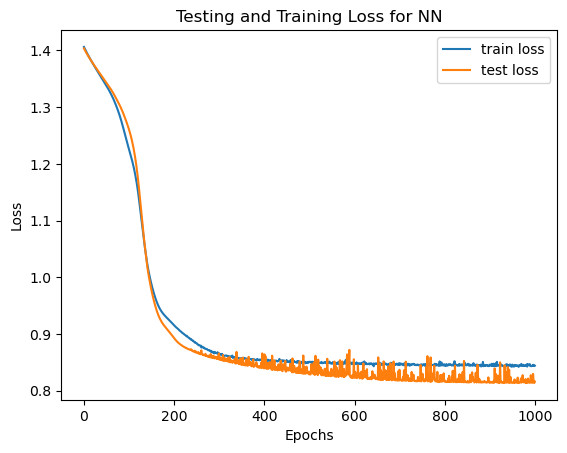

In [38]:
#plotting loss with training and testing the NN

plt.plot(train_loss, label='train loss')
plt.plot(test_loss, label = 'test loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Testing and Training Loss for NN")

In [39]:
#testing NN

print("Testing:")
opt.zero_grad()
output = myNN(tTestD)
print(tTestD.shape)
loss = lossfunction(output, tTestT)

Testing:
torch.Size([15, 4])


Overall, the code snippet performs a forward pass of the neural network model on the testing data, prints the shape of the testing data, and calculates the loss between the predicted outputs and the target labels. This can be useful for evaluating the performance of the model on the testing data after training.

Printing the shape of the testing data is crucial as it allows for data verification, debugging, and input size considerations. It helps ensure that the testing data matches the expected input shape for the neural network model. Additionally, it provides insights into the number of samples and dimensions, which is vital for designing and configuring the model. Checking the data shape ensures that preprocessing steps have been correctly applied. 

In [40]:
#analyzing and printing results for one epoch

predictions = []
for row in output:
    if row.max() == row[0]:
        predictions.append(0)
    elif row.max() == row[1]:
        predictions.append(1)
    else:
        predictions.append(2)
tPreds = torch.tensor(predictions).view(15,1)
tTargets = tTestT.view(15,1)

result = torch.cat([tPreds,tTargets], dim=1)
print(result)
correct = 0
for row in result:
    if row[0] == row[1]:
        correct += 1

print(correct)

tensor([[1, 1],
        [0, 0],
        [1, 2],
        [1, 1],
        [1, 1],
        [0, 0],
        [1, 1],
        [1, 2],
        [1, 1],
        [1, 1],
        [1, 2],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0]])
12


The above code snippet is not necessary but can be helpful to understand the accuracy of the model's prediction. The code snippet calculates the predicted labels based on the output tensor, compares them with the target labels, and prints the resulting tensor as well as the number of correct predictions. 